# Hadoop Streaming Using Python – Word Count Problem

Hadoop Streaming is a feature that comes with Hadoop and allows users or developers to use various different languages for writing MapReduce programs like Python, C++, Ruby, etc. It supports all the languages that can read from standard input and write to standard output.

We will implement the word count problem in python to understand Hadoop Streaming. We will be creating mapper.py and reducer.py to perform map and reduce tasks.

Let’s create one file which contains multiple words that we can count. 

**Step 1: Create a file with the name word_count_data.txt  and add some data to it.**

In [ ]:
"""word_count_data.txt""" 

HDFS is a storage unit of Hadoop
Mapreduce is a processing tool of Hadoop

In [ ]:
See the content of the file.
Command:  type file_name

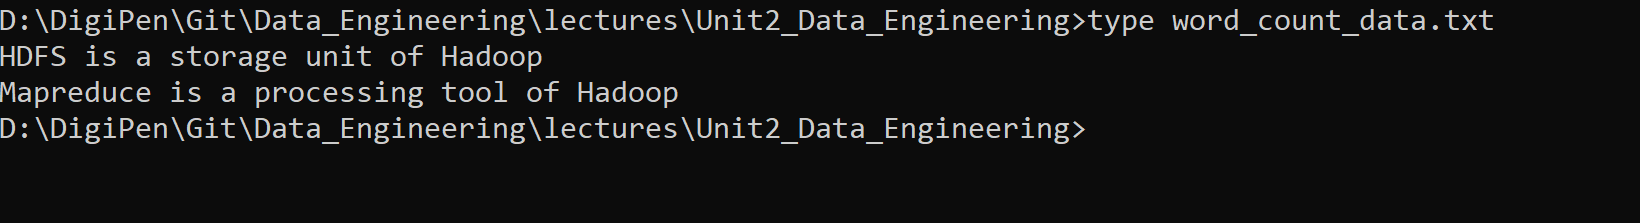

**Step 2: Create a mapper.py file that implements the mapper logic. It will read the data from STDIN and will split the lines into words, and will generate an output of each word with its individual count.**

In [ ]:
#!/usr/bin/env python
"""mapper.py"""

import sys

# input comes from STDIN (standard input)
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()
    # split the line into words
    words = line.split()
    # increase counters
    for word in words:
        # write the results to STDOUT (standard output);
        # what we output here will be the input for the
        # Reduce step, i.e. the input for reducer.py
        #
        # tab-delimited; the trivial word count is 1
        print('%s\t%s' % (word, 1))

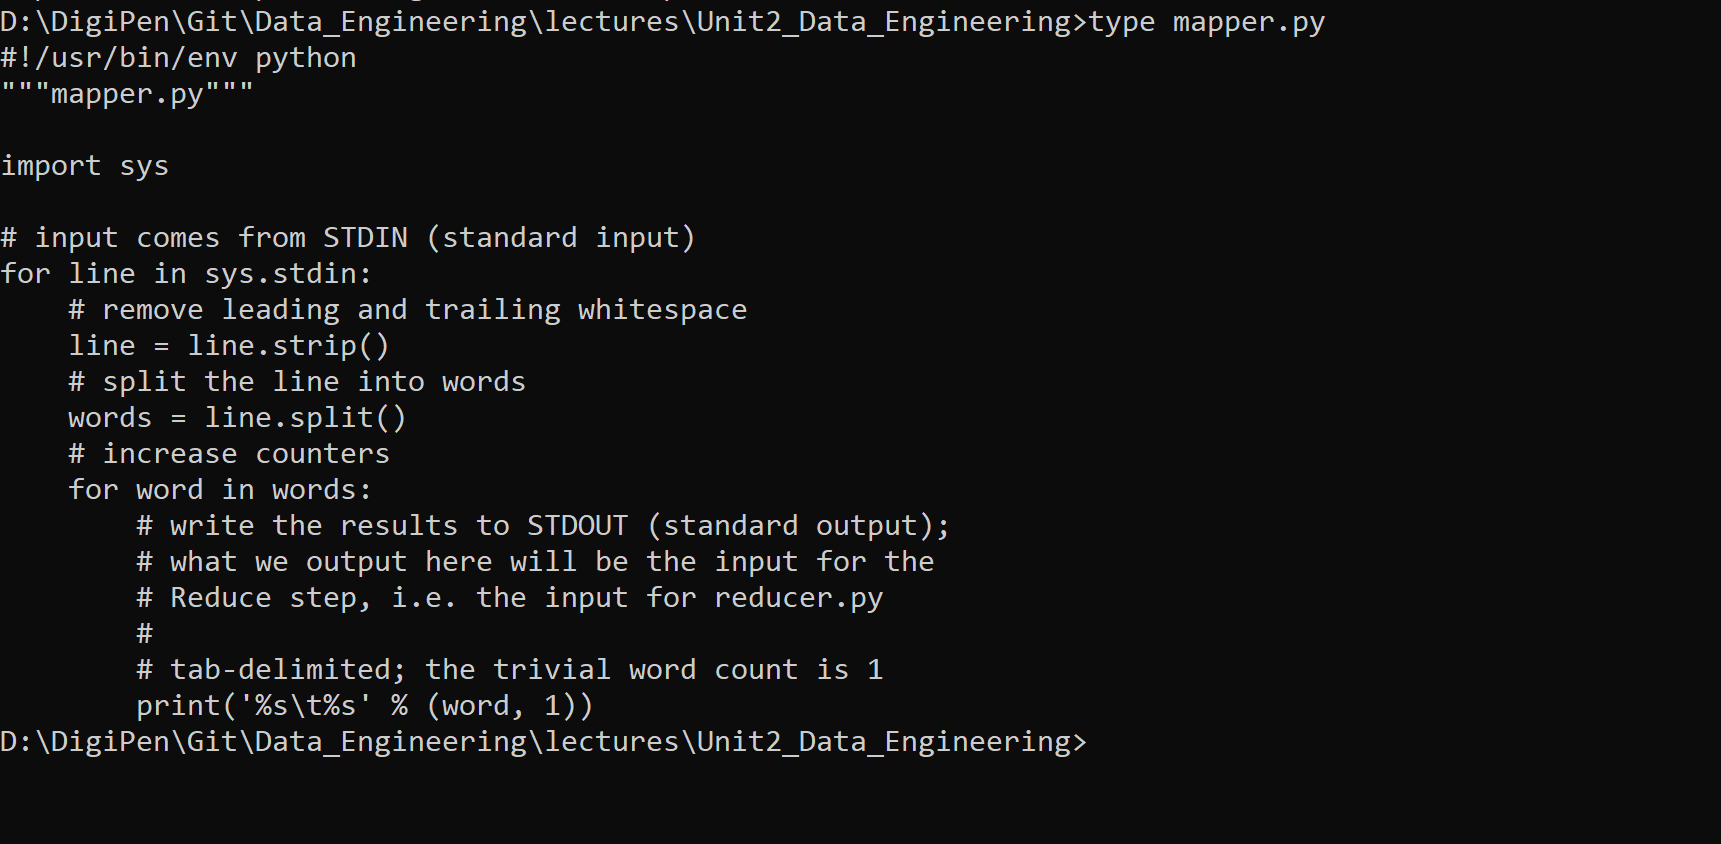

Let’s test our mapper.py locally that it is working fine or not.

In [ ]:
type word_count_data.txt | python mapper.py

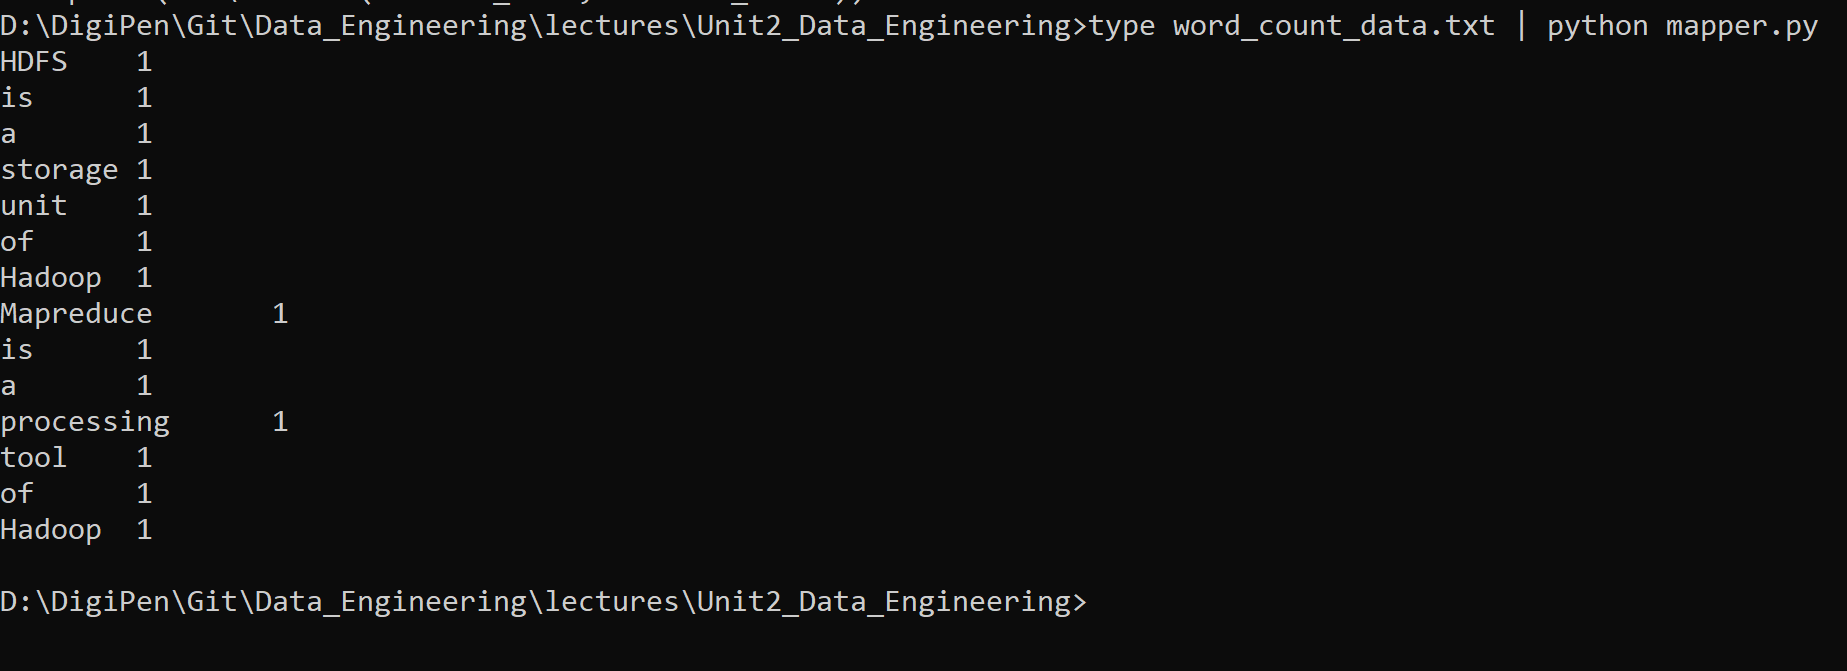

**Step 3: Create a reducer.py file that implements the reducer logic. It will read the output of mapper.py from STDIN(standard input) and will aggregate the occurrence of each word and will write the final output to STDOUT.**

In [ ]:
#!/usr/bin/env python
"""reducer.py"""

from operator import itemgetter
import sys

current_word = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip()

    # parse the input we got from mapper.py
    word, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # write result to STDOUT
            print('%s\t%s' % (current_word, current_count))
        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print('%s\t%s' % (current_word, current_count))

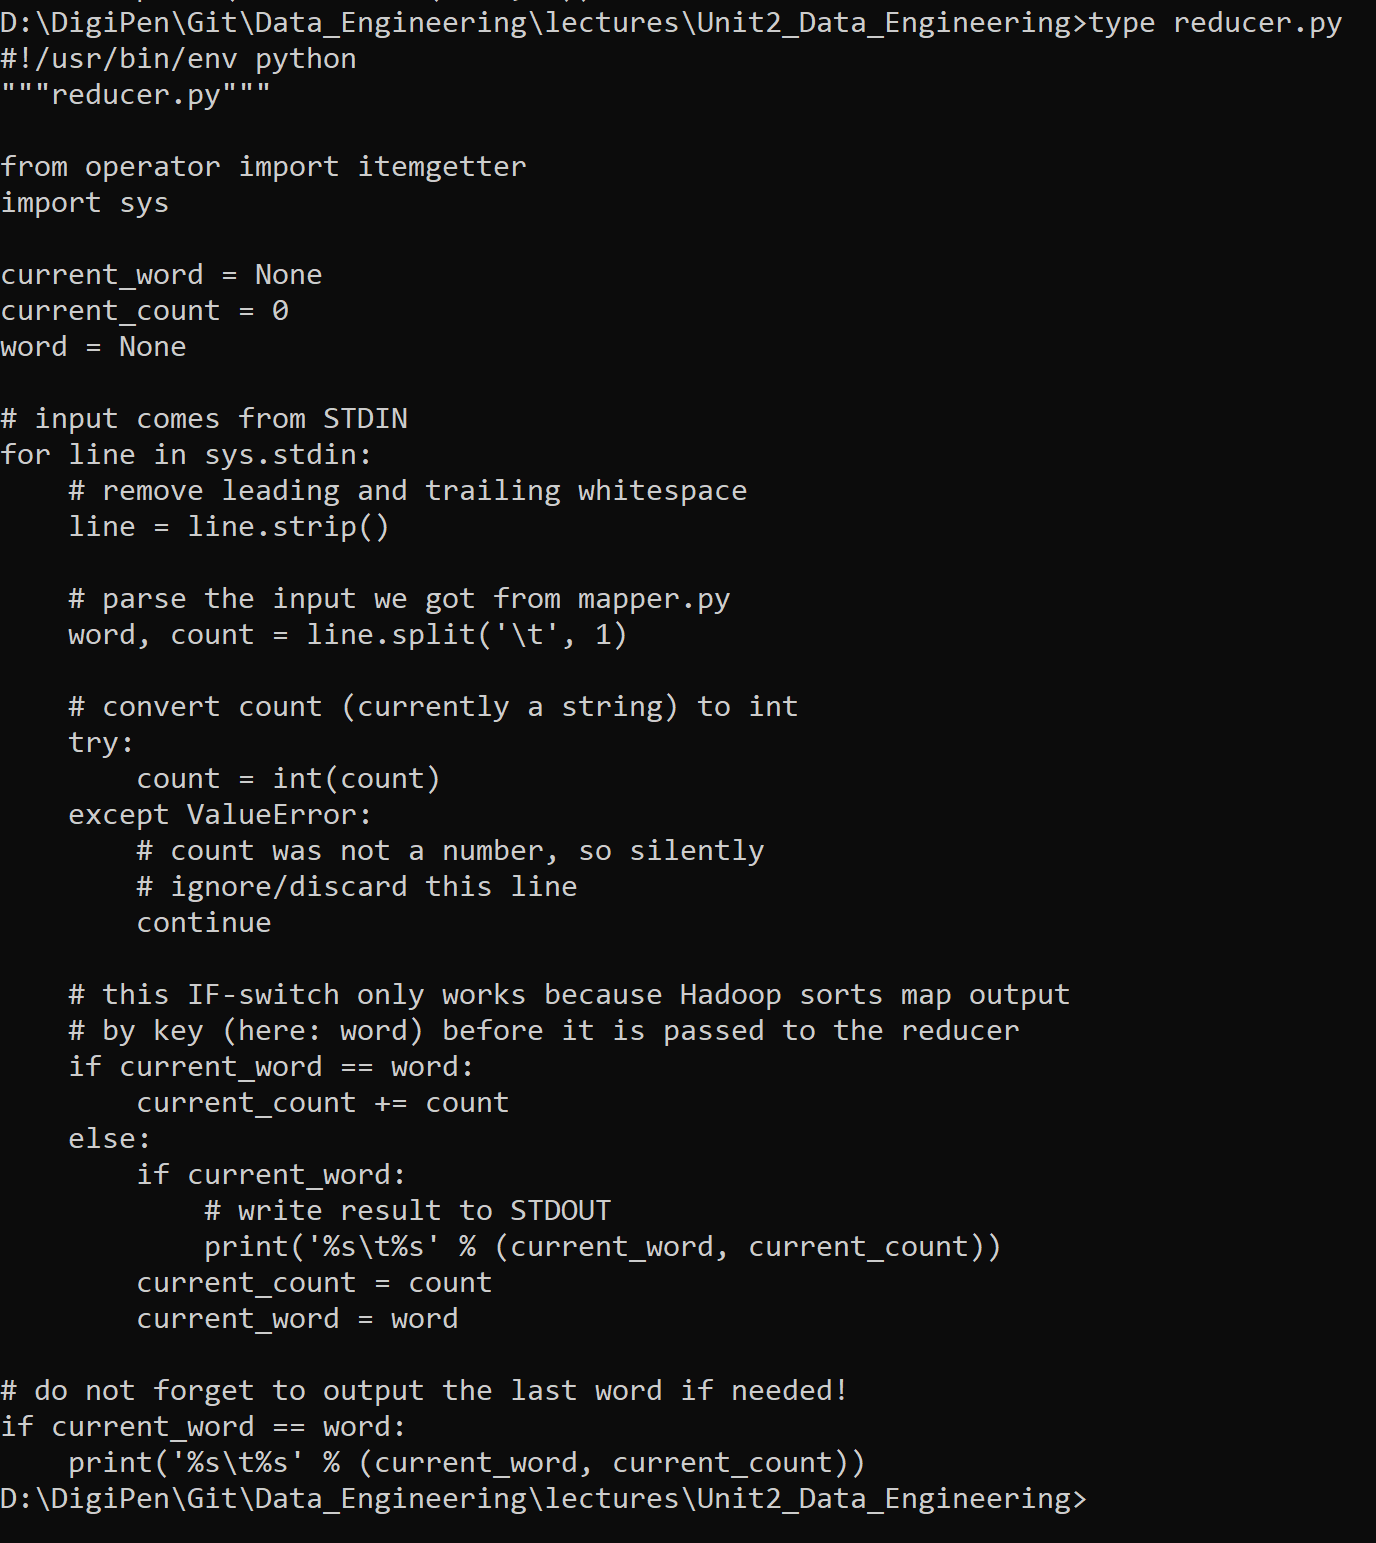

Now let’s check our reducer code reducer.py with mapper.py is it working properly or not with the help of the below command.

In [ ]:
type word_count_data.txt | python mapper.py | sort | python reducer.py

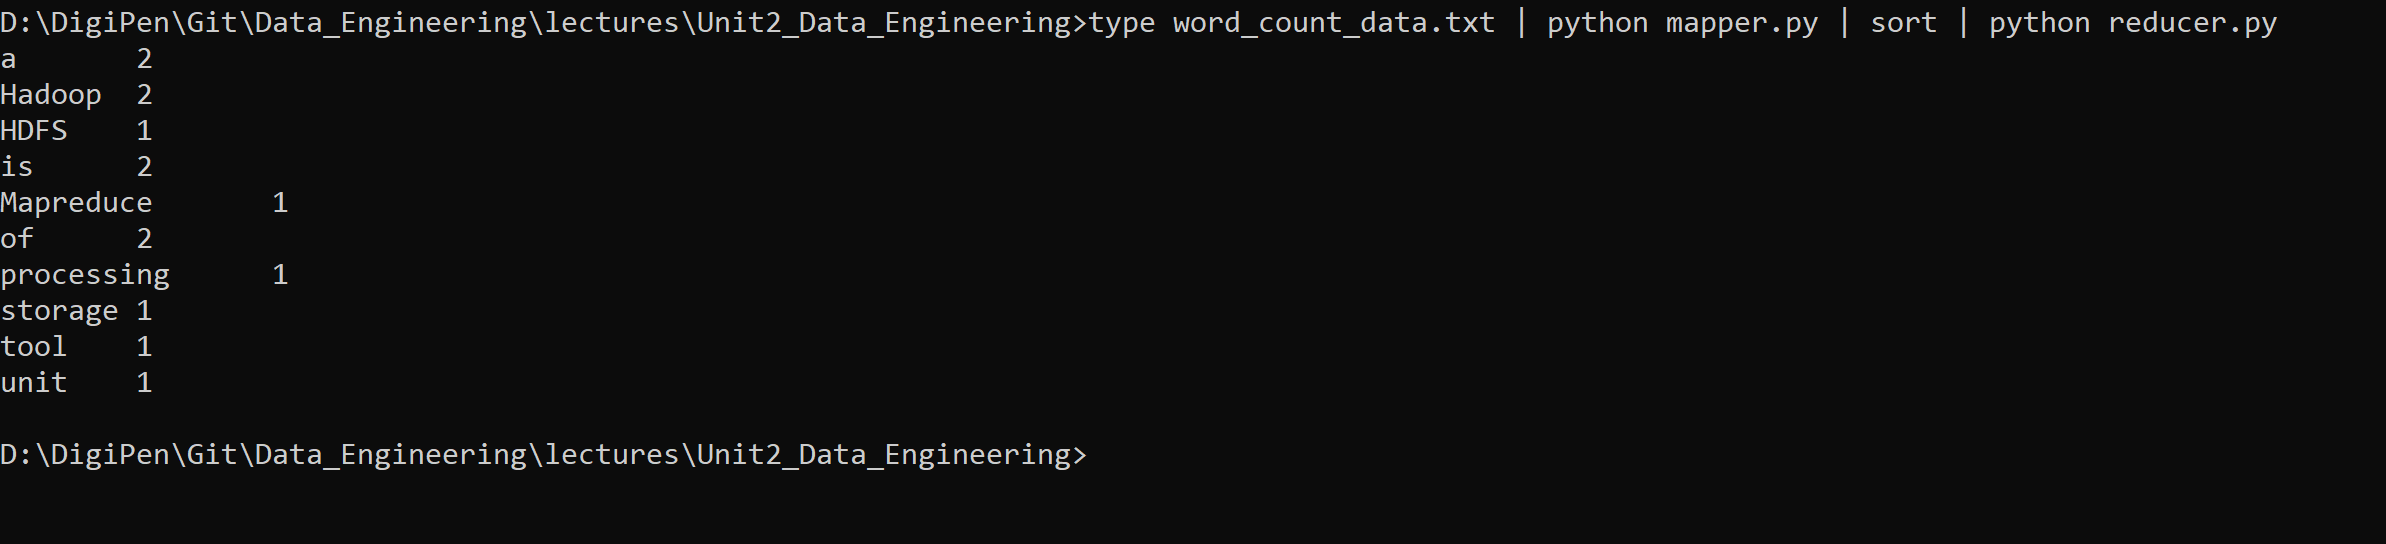

We can see that our reducer is also working fine in our local system.  


**Step 4: Now let’s start all our Hadoop daemons with the below command.**

In [ ]:
start-dfs.cmd
start-yarn.cmd

Now make a directory word_count_in_python in our HDFS in the root directory that will store our word_count_data.txt file with the below command.

In [ ]:
hadoop fs -mkdir /word_count_in_python

In [ ]:
#OR

hdfs dfs -mkdir /word_count_in_python

Copy word_count_data.txt to this folder in our HDFS.

In [ ]:
hadoop fs -put D:\DigiPen\Git\Data_Engineering\lectures\Unit2_Data_Engineering\word_count_data.txt /word_count_in_python

**CMD Command suited for my own use**

```cmd
hadoop fs -put ""D:\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\ord_count_data.txt"" /word_count_in_python
```

In [ ]:
#OR

hdfs dfs -copyFromLocal C:\\word_count_data.txt /word_count_in_python

Now our data file has been sent to HDFS successfully. we can check whether it sends or not by using the below command.

In [ ]:
hadoop fs -ls /word_count_in_python

In [ ]:
#OR
hdfs dfs -ls /        # list down content of the root directory
hdfs dfs -ls /word_count_in_python   # list down content of /word_count_in_python directory

**Step 5: Now let’s run our python files with the help of the Hadoop streaming utility as shown below.**  


In [ ]:
hadoop jar C:/Hadoop/hadoop-3.1.0/share/hadoop/tools/lib/hadoop-streaming-3.1.0.jar  -mapper "python D:/DigiPen/Git/Data_Engineering/lectures/Unit2_Data_Engineering/mapper.py" -reducer "python D:/DigiPen/Git/Data_Engineering/lectures/Unit2_Data_Engineering/reducer.py" -input /word_count_in_python/word_count_data.txt -output /word_count_in_python/output

Both the mapper and reducer python files are stored in C:\\.

**IF the output is already created, use this command to delete it:**

```cmd
hadoop fs -rm -r /word_count_in_python/output
```

**IF your directory path has space, ' ', enclose the path name with 2 double quotes, e.g. ""D:/Digi Pen/mapper.py""**

```cmd
""D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\mapper.py" -reducer "python D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\reducer.py""
```

**Full commands**

```cmd
hadoop jar C:/Hadoop/hadoop-3.1.0/share/hadoop/tools/lib/hadoop-streaming-3.1.0.jar -mapper "python ""D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\mapper.py""" -reducer "python ""D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\reducer.py""" -input /word_count_in_python/word_count_data.txt -output /word_count_in_python/output
```

In [ ]:
hadoop jar C:/Hadoop/hadoop-3.1.0/share/hadoop/tools/lib/hadoop-streaming-3.1.0.jar -mapper "python C:\\mapper.py" -reducer "python C:\\reducer.py" -input /word_count_in_python/word_count_data.txt -output /word_count_in_python/output

In [ ]:
hadoop jar C:/Hadoop/hadoop-3.1.0/share/hadoop/tools/lib/hadoop-streaming-3.1.0.jar -mapper "python ""D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\mapper.py""" -reducer "python ""D:\\OneDrive - Nanyang Technological University\DIGIPEN_TFIP_IBF_LESSONS\Week 22\reducer.py""" -input /word_count_in_python/word_count_data.txt -output /word_count_in_python/output

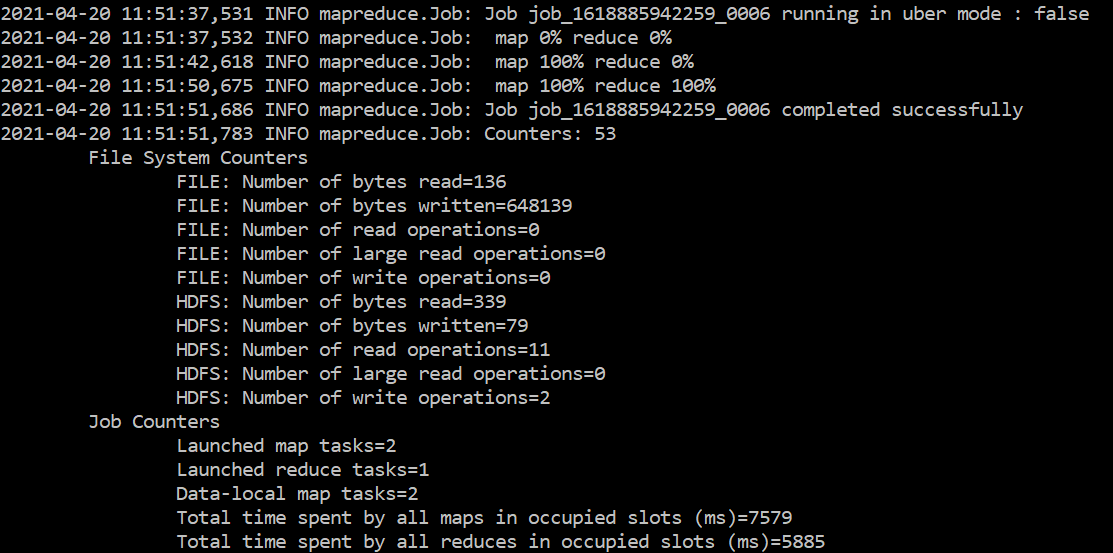

In the above command in -output, we will specify the location in HDFS where we want our output to be stored. So let’s check our output in output file at location /word_count_in_python/output/part-00000 in my case. 

In [ ]:
hadoop fs -cat /word_count_in_python/output/part-00000

In [ ]:
#OR
hdfs dfs -cat /word_count_in_python/output/part-00000

**Step 6: Assuming the job completes successfully, the output will be placed in the local folder where the repository files are located.**

In [ ]:
hadoop fs -get /word_count_in_python/output D:/Unit2_Data_Engineering/

In [ ]:
hdfs dfs -copyToLocal /word_count_in_python/output

## Verification
To access information about resource manager current jobs, successful and failed jobs, go to this link in browser- http://localhost:8088/cluster

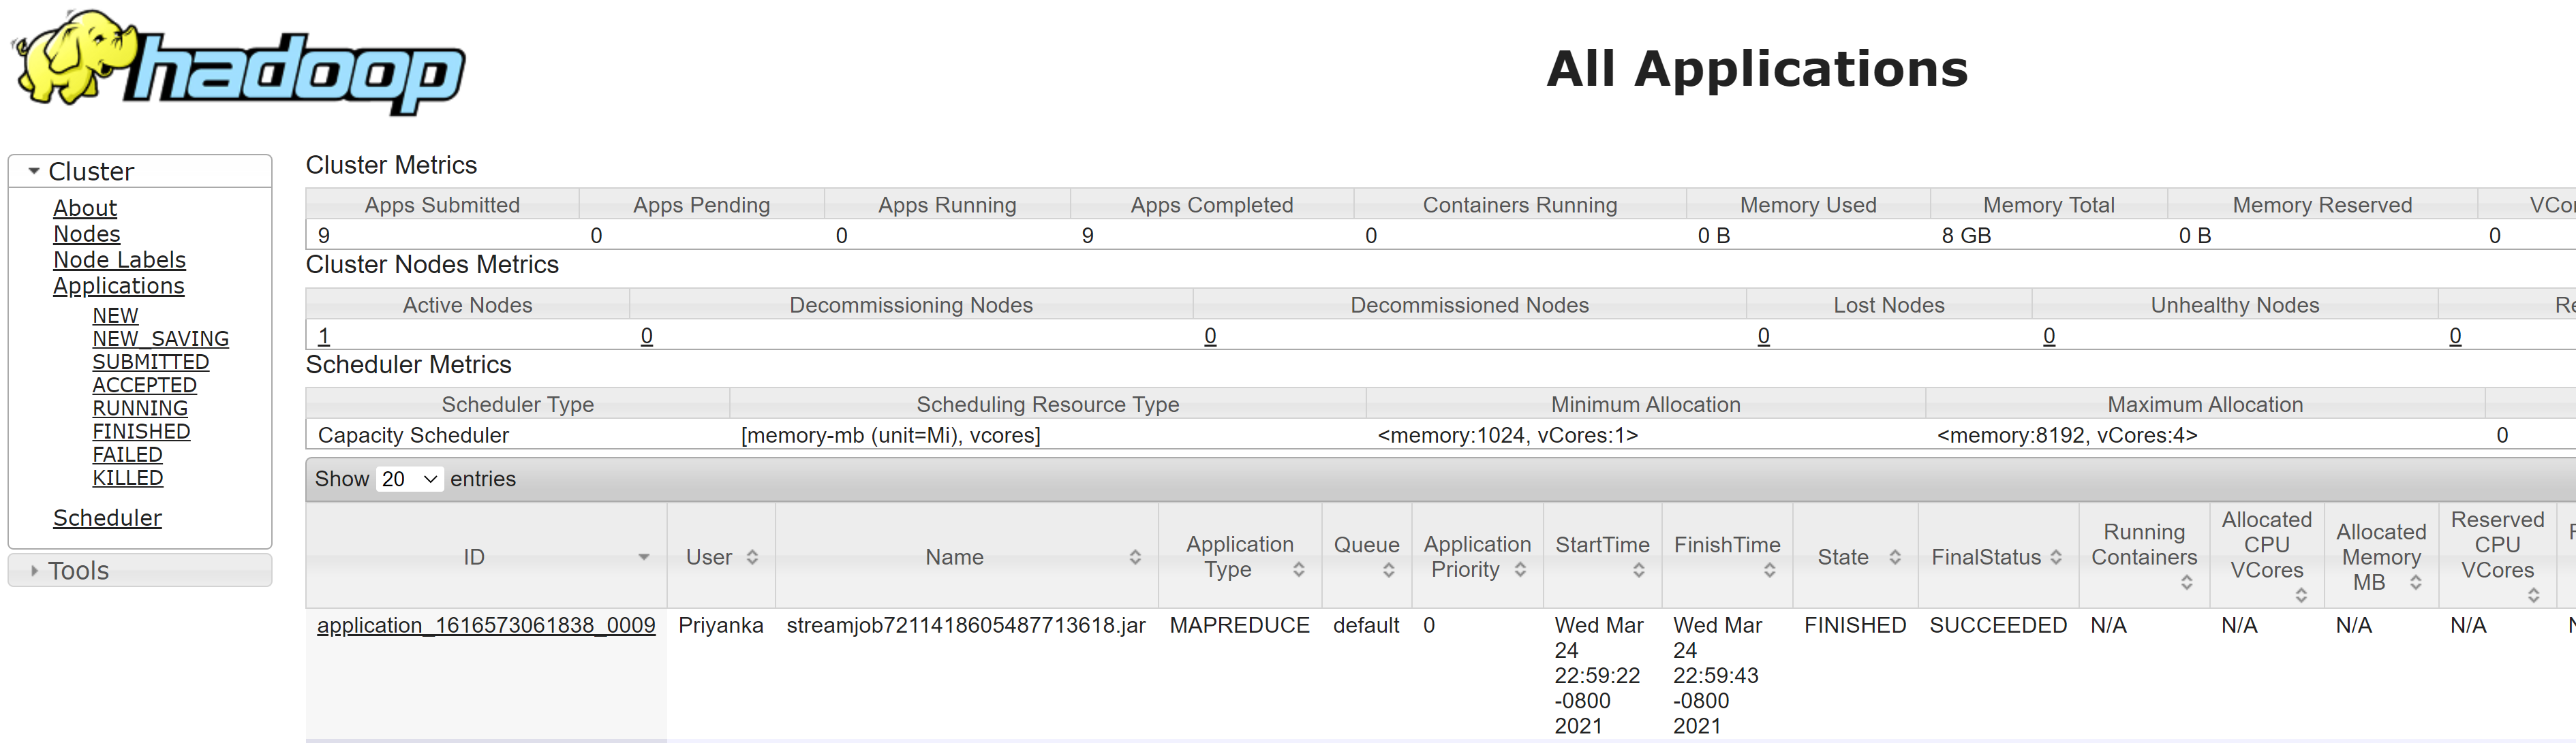